### Business Use

#### About the company
    <p> IKEA is a European multinational retail group founded in 1943, that designs and sells ready-to-assemble furniture, kitchen appliances and home accessories, among other useful goods and occasionally home services. Founded by Ingvar kempard.It as a 433 stores in the world and a revenue of €41.3 billion(2019).</p>

#### Problem definition
    <p>We have Retail dataset of a IKEA stores in European region for 4 years. We have different attributes consisting mainly of Customer details, product details and order details.</p>

#### Outcome
    <p>There is multiple sales happening everyday, here we like to carry out the product level segmentation on the  basis of sales and discount.So that will get clusters, in which we can make out the predictions as which product as sold the most.

#### Data Dictionary
<ul>
	<li>Product Id: Unique ID for each product</li>
    <li>Sales: sales happened corresponding to each product</li>
    <li>Discount: Discount given on each product</li>
    <li>Profit: what is the corresponding profit got from each product</li>
</ul>

<img src='ikea.jpg' alt="image of a IKEA store" height="500" width="500">

### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\abhisv.CORP\\3D Objects\\superstore_dataset2011-2015.csv",encoding='latin1')

In [3]:
df.var().sort_values(ascending=False)

Postal Code      1.028080e+09
Row ID           2.192263e+08
Sales            2.377200e+05
Profit           3.039477e+04
Shipping Cost    3.282924e+03
Quantity         5.192776e+00
Discount         4.506277e-02
dtype: float64

In [4]:
base_dataset_backup=df

#### Memory Management



In [5]:
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

Memory usage of dataframe is 9.39 MB
Memory usage after optimization is: 4.02 MB
Decreased by 57.2%


In [6]:
df.shape

(51290, 24)

In [7]:
df.dtypes

Row ID               int32
Order ID          category
Order Date        category
Ship Date         category
Ship Mode         category
Customer ID       category
Customer Name     category
Segment           category
City              category
State             category
Country           category
Postal Code        float32
Market            category
Region            category
Product ID        category
Category          category
Sub-Category      category
Product Name      category
Sales              float16
Quantity              int8
Discount           float16
Profit             float16
Shipping Cost      float16
Order Priority    category
dtype: object

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df.describe().columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

In [10]:
base_df=df.groupby('Customer Name').sum()[['Sales','Profit']]

In [11]:
base_df.reset_index(inplace=True)

In [12]:
base_df.tail()

,Customer Name,Sales,Profit
790,Xylona Preis,12200.0,1304.000
791,Yana Sorensen,20032.0,3450.000
792,Yoseph Carroll,20160.0,4348.000
793,Zuschuss Carroll,28480.0,436.750
794,Zuschuss Donatelli,12432.0,201.625


In [13]:
base_df.shape

(795, 3)

#### Null value treatment


In [14]:
def null_values(base_df):
    print(base_df.isna().sum())
    ## null value percentage     
    null_value_table=(base_df.isna().sum()/base_df.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_df.drop(drop_columns,axis=1,inplace=True)
    len(base_df.isna().sum().index)
    cont=base_df.describe().columns
    cat=[i for i in base_df.columns if i not in base_df.describe().columns]
    for i in cat:
        base_df[i].fillna(base_df[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_df[i].fillna(base_df[i].median(),inplace=True)
    print(base_df.isna().sum())
    return base_df,cat,cont

In [15]:
base_df,cat,cont=null_values(base_df)

Customer Name    0
Sales            0
Profit           0
dtype: int64
30
30
Customer Name    0
Sales            0
Profit           0
dtype: int64


In [16]:
base_df.columns

Index(['Customer Name', 'Sales', 'Profit'], dtype='object')

#### Outlier treatment


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text xticklabel objects>)

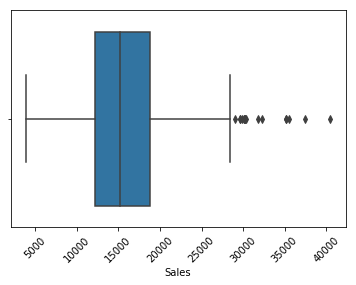

In [17]:
import seaborn as sns
sns.boxplot(base_df['Sales'])
plt.xticks(rotation=45)

(array([-8000., -6000., -4000., -2000.,     0.,  2000.,  4000.,  6000.,
         8000., 10000.]), <a list of 10 Text xticklabel objects>)

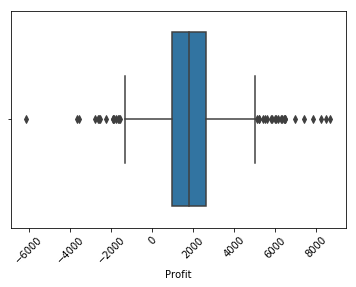

In [18]:
import seaborn as sns
sns.boxplot(base_df['Profit'])
plt.xticks(rotation=45)

In [19]:
def outliers_transform(base_df):
    for i in base_df.var().sort_values(ascending=False).index[1:10]:
        x=np.array(base_df[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_df[i]=y

In [20]:
outliers_transform(base_df)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text xticklabel objects>)

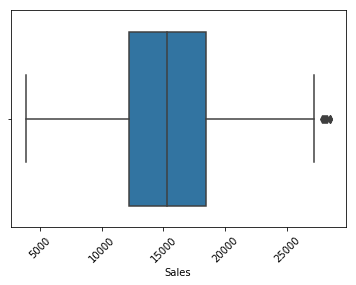

In [21]:
import seaborn as sns
sns.boxplot(base_df['Sales'])
plt.xticks(rotation=45)

(array([-8000., -6000., -4000., -2000.,     0.,  2000.,  4000.,  6000.,
         8000., 10000.]), <a list of 10 Text xticklabel objects>)

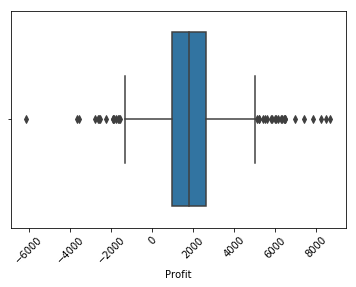

In [22]:
import seaborn as sns
sns.boxplot(base_df['Profit'])
plt.xticks(rotation=45)

#### Min max scalar


In [23]:
from sklearn.preprocessing import MinMaxScaler
def MinMaxScalerCustom(base_df):
    le=MinMaxScaler()
    le.fit(base_df)
    x=le.transform(base_df)
    data1=pd.DataFrame(x)
    data1.columns=base_df.columns
    base_df=data1
    return base_df


In [24]:
base_df1=MinMaxScalerCustom(base_df[['Sales','Profit']])

In [25]:
base_df1.head(5)

,Sales,Profit
0,0.843826,0.730977
1,0.686351,0.580410
2,0.419554,0.439928
3,0.662925,0.750944
4,0.724744,0.543308


In [26]:
base_df2=base_df['Customer Name']

In [27]:
final_df=pd.concat([base_df1,base_df2], axis=1,sort=False)

In [28]:
final_df

,Sales,Profit,Customer Name
0,0.843826,0.730977,Aaron Bergman
1,0.686351,0.580410,Aaron Hawkins
2,0.419554,0.439928,Aaron Smayling
3,0.662925,0.750944,Adam Bellavance
4,0.724744,0.543308,Adam Hart
5,0.469985,0.510861,Adam Shillingsburg
6,0.863348,0.848084,Adrian Barton
7,0.305678,0.555451,Adrian Hane
8,0.300797,0.520507,Adrian Shami
9,0.500569,0.612385,Aimee Bixby


In [29]:
final_df.shape

(795, 3)

In [30]:
final_df1=final_df[['Sales','Profit']]

#### Univariate analysis (EDA)


In [31]:
final_df.head(2)

,Sales,Profit,Customer Name
0,0.843826,0.730977,Aaron Bergman
1,0.686351,0.580410,Aaron Hawkins


#### Bivariate analysis (EDA)


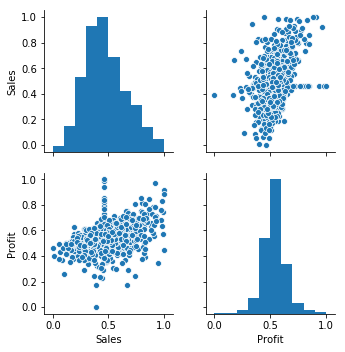

In [32]:
sns.pairplot(final_df)

### Model Building

#### Identifying the right number of clusters

In [33]:
# Using the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt

def kelbow(final_df1,k):
    from sklearn.cluster import KMeans
    x = []
    for i in range(1,k):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(final_df1)
        x.append(kmeans.inertia_)

    plt.plot(range(1,30), x)
    plt.title('The elbow method')
    plt.xlabel('The number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    return x

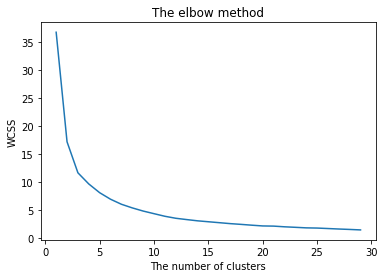

[36.68929028256666,
 17.139811228746733,
 11.609685661870964,
 9.618435013944268,
 8.059414923259862,
 6.894861893469611,
 5.99679221069994,
 5.3476384542452085,
 4.784406870034462,
 4.314743053822717,
 3.8526329269402275,
 3.496973375585943,
 3.2632072256845643,
 3.0408976243250407,
 2.874917668865053,
 2.7088693486695448,
 2.541567485217679,
 2.406667558145912,
 2.2598692289827467,
 2.1268681761484203,
 2.0961467114381738,
 1.973922221965824,
 1.8819041320664838,
 1.7846790248951088,
 1.7487302511351017,
 1.6644501953562643,
 1.577818949777833,
 1.502630539554184,
 1.4173668310328331]

In [34]:
kelbow(final_df1,30)

#### Clustering

In [35]:
final_df.head(2)

,Sales,Profit,Customer Name
0,0.843826,0.730977,Aaron Bergman
1,0.686351,0.580410,Aaron Hawkins


In [36]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,random_state=40)
km.fit(final_df1[['Sales','Profit']])
len(km.predict(final_df1[['Sales','Profit']]))

795

In [37]:
km.predict(final_df1[['Sales','Profit']])

array([4, 1, 3, 4, 1, 3, 4, 0, 0, 2, 3, 1, 3, 4, 1, 0, 3, 3, 1, 3, 3, 3,
       2, 2, 0, 0, 0, 3, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 2, 0,
       3, 2, 4, 2, 3, 3, 0, 1, 3, 3, 2, 3, 0, 4, 1, 1, 2, 0, 2, 3, 0, 0,
       1, 3, 1, 0, 2, 3, 0, 2, 2, 1, 2, 4, 2, 2, 3, 1, 1, 3, 0, 3, 0, 3,
       4, 0, 4, 1, 3, 2, 2, 0, 1, 4, 0, 3, 3, 3, 2, 0, 3, 3, 0, 0, 2, 2,
       4, 3, 0, 4, 2, 3, 1, 3, 1, 2, 3, 1, 4, 3, 3, 1, 2, 4, 0, 3, 4, 3,
       3, 1, 3, 0, 3, 2, 1, 3, 2, 3, 3, 1, 4, 3, 3, 3, 3, 2, 4, 2, 0, 0,
       3, 4, 0, 2, 4, 3, 3, 2, 3, 4, 4, 3, 3, 2, 2, 0, 1, 3, 2, 2, 1, 3,
       3, 0, 2, 1, 0, 1, 3, 0, 2, 3, 3, 2, 1, 3, 3, 2, 1, 3, 3, 4, 1, 0,
       3, 3, 2, 3, 1, 4, 2, 2, 4, 0, 0, 2, 1, 3, 0, 3, 0, 4, 3, 3, 2, 2,
       1, 2, 1, 0, 1, 3, 2, 4, 2, 3, 2, 4, 2, 4, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 0, 3, 3, 4, 2, 0, 2, 4, 2, 3, 0, 4,
       2, 0, 3, 2, 0, 0, 2, 2, 3, 2, 1, 4, 2, 0, 2, 2, 2, 3, 3, 0, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 3, 4, 2, 0, 4, 2, 0, 3,

In [41]:
base_df['clusters']=km.predict(final_df1[['Sales','Profit']])# adding the 'clusters' column to base_df

In [42]:
base_df.head(2)

,Customer Name,Sales,Profit,clusters
0,Aaron Bergman,24640.0,4684.0,4
1,Aaron Hawkins,20768.0,2452.0,1


#### Visualizing the clusters

In [43]:
base_df['clusters'].value_counts()

3    247
2    188
0    165
1    108
4     87
Name: clusters, dtype: int64

In [44]:
base_df_c1=base_df[base_df['clusters']==1]

In [45]:
base_df_c1['Sales'].mean()

20237.777777777777

In [46]:
base_df_c1.shape

(108, 4)

In [47]:
base_df_c1[base_df_c1['Sales']<base_df_c1['Sales'].mean()]['Customer Name'].values.shape

(64,)

In [48]:
Potntial_customers=base_df_c1[base_df_c1['Sales']<base_df_c1['Sales'].mean()]

In [49]:
Potntial_customers.head(2)

,Customer Name,Sales,Profit,clusters
11,Alan Dominguez,18544.0,1540.0,1
31,Andrew Allen,19760.0,2070.0,1


In [50]:
Potntial_customers.shape[0]

64

In [51]:
(abs(Potntial_customers['Sales']-base_df_c1['Sales'].mean()).sum())/Potntial_customers.shape[0]

1227.2777777777774

#### Interpreting the clusters

### Model Validation

#### Checking the accuracy of clusters

In [52]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
base_df.head(2)

,Customer Name,Sales,Profit,clusters
0,Aaron Bergman,24640.00,4684.00,4
1,Aaron Hawkins,20768.00,2452.00,1


In [54]:
pd.DataFrame(base_df.groupby("clusters").describe()).T

clusters            0        1        2        3        4
Sales  count   165.00   108.00   188.00   247.00    87.00
       mean   9709.28 20237.78 16641.57 13696.06 23792.92
       std    1661.56  1869.02  1349.98  1256.62  2234.19
       min    3892.00 17040.00 13680.00 11480.00 20048.00
       25%    8688.00 18892.00 15542.00 12716.00 22224.00
       50%   10152.00 19960.00 16488.00 13528.00 23408.00
       75%   10992.00 21368.00 17556.00 14720.00 25336.00
       max   11832.00 27168.00 20032.00 16928.00 28480.00
Profit count   165.00   108.00   188.00   247.00    87.00
       mean       inf      inf      inf      inf      inf
       std        inf      inf      inf      inf      inf
       min   -2270.00 -3578.00   865.50 -6152.00   436.75
       25%     519.00   724.00  2120.00   722.00  3192.00
       50%    1031.00  1474.00  2579.00  1401.00  3920.00
       75%    1552.00  2061.00  3148.50  1945.50  4610.00
       max    3138.00  2970.00  8672.00  3046.00  8208.00

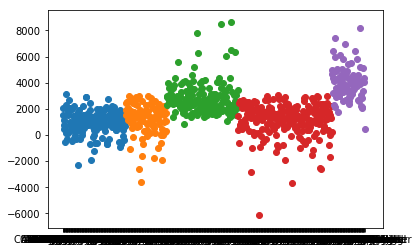

In [60]:
plt.scatter(base_df[base_df['clusters']==0]['Customer Name'],base_df[base_df['clusters']==0]['Profit'])
plt.scatter(base_df[base_df['clusters']==1]['Customer Name'],base_df[base_df['clusters']==1]['Profit'])
plt.scatter(base_df[base_df['clusters']==2]['Customer Name'],base_df[base_df['clusters']==2]['Profit'])
plt.scatter(base_df[base_df['clusters']==3]['Customer Name'],base_df[base_df['clusters']==3]['Profit'])
plt.scatter(base_df[base_df['clusters']==4]['Customer Name'],base_df[base_df['clusters']==4]['Profit'])

#### Accuracy metrics

In [61]:
base_df[base_df['clusters']==1].shape

(108, 4)

In [62]:
import math
total_entropy=[]
for i in base_df[base_df['clusters']==1]['Sales']:
    num= list(base_df[base_df['clusters']==1]['Sales'].values).count(i)
    den= base_df[base_df['clusters']==1]['Sales'].shape[0]
    total_entropy.append(((num/den)*(1/math.log(num/den,2))))
    

total_entropy=np.array(total_entropy).sum()

total_entropy=-(total_entropy)

total_entropy

0.19699011632835461

In [63]:
import math
total_entropy=[]
for i in base_df[base_df['clusters']==1]['Profit']:
    num= list(base_df[base_df['clusters']==1]['Profit'].values).count(i)
    den= base_df[base_df['clusters']==1]['Profit'].shape[0]
    total_entropy.append(((num/den)*(1/math.log(num/den,2))))
    

total_entropy=np.array(total_entropy).sum()

total_entropy=-(total_entropy)

total_entropy

0.14804095548293253

### Model Finetuning

#### improving the clusters by selecting the better criteria

### Model Deployment

#### flask api to access the model deployment 